## Daily Challenge: W3_D2

You will work with the “Global Power Plant Database” provided by the World Resources Institute, which contains detailed information about power plants worldwide. This dataset is ideal for practicing array manipulations, statistical analysis, and time series data handling.

#### Step 1: Data Import and Cleaning

In [1]:
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations and statistics
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns            # For advanced visualization

# Optional: configure plots to show inline (in Jupyter) and improve style
%matplotlib inline
sns.set(style="whitegrid", palette="muted")

In [3]:
df = pd.read_csv("global_power_plant_database.csv", encoding="utf-8", low_memory=False)

In [5]:
# Preview the first five rows
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [6]:
# Display general info about the dataset (data types, non-null counts)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [11]:
# Check for missing values in each column
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

Missing values per column:
 country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_g

In [8]:
# Check the data type of the 'capacity_mw' column
print("Type before conversion:", df['capacity_mw'].dtype)

Type before conversion: float64


In [9]:
# Convert 'capacity_mw' to numeric, coercing errors into NaN
df['capacity_mw'] = pd.to_numeric(df['capacity_mw'], errors='coerce')

In [10]:
# Verify the data type after conversion
print("Type after conversion:", df['capacity_mw'].dtype)

Type after conversion: float64


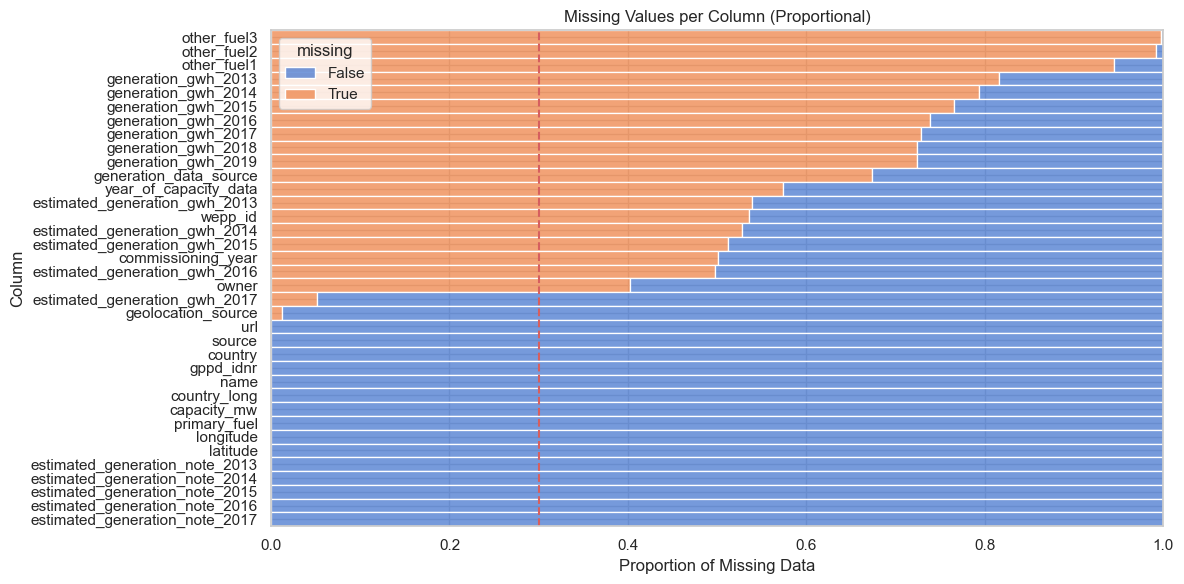

In [ ]:
# Melt to long format for missing values
df_melted = df[na_order].isnull().melt(value_name='missing')

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_melted,
    y='variable',
    hue='missing',
    multiple='fill',
    shrink=1.0,        # pleine largeur
    bins=len(na_order) # 1 bin par variable
)

plt.axvline(0.3, color='r', linestyle='--')
plt.xlabel("Proportion of Missing Data")
plt.ylabel("Column")
plt.title("Missing Values per Column (Proportional)")
plt.tight_layout()
plt.show()

This chart illustrates the proportion of missing and non-missing values across all columns in the dataset. Each bar shows the relative share of missing data (in orange) per column.

Based on this visualization, we decided to drop all columns with more than 30% missing data, as they would not contribute reliable insights to the analysis.

#### Python code – Drop + Rename Columns

In [22]:
# Step 1: Drop columns with more than 30% missing values
threshold = 0.3
cols_to_drop = df.isnull().mean()[df.isnull().mean() > threshold].index
df_cleaned = df.drop(columns=cols_to_drop)

In [24]:
# Step 2: Rename selected columns for clarity
df_cleaned = df_cleaned.rename(columns={
    'country': 'iso_code',
    'country_long': 'country_name',
    'name': 'plant_name',
    'gppd_idnr': 'plant_id',
    'capacity_mw': 'capacity_mw',
    'latitude': 'lat',
    'longitude': 'lon',
    'primary_fuel': 'primary_fuel',
    'commissioning_year': 'start_year',
    'owner': 'owner',
    'source': 'source',
    'url': 'source_url',
    'geolocation_source': 'geo_source',
    'estimated_generation_gwh_2017': 'estimated_generation_2017'
    # Add more if needed later
})

# Preview the cleaned and renamed dataframe
df_cleaned.head()

,iso_code,country_name,plant_name,plant_id,capacity_mw,lat,lon,primary_fuel,source,source_url,geo_source,estimated_generation_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,GEODB,http://globalenergyobservatory.org,GEODB,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,GEODB,http://globalenergyobservatory.org,GEODB,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,GEODB,http://globalenergyobservatory.org,GEODB,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


| Original Column Name            | New Column Name             | Description                       |
| ------------------------------- | --------------------------- | --------------------------------- |
| `country`                       | `iso_code`                  | Country ISO code                  |
| `country_long`                  | `country_name`              | Full country name                 |
| `name`                          | `plant_name`                | Name of the power plant           |
| `gppd_idnr`                     | `plant_id`                  | Unique plant identifier           |
| `capacity_mw`                   | `capacity_mw`               | Installed capacity in MW          |
| `latitude`, `longitude`         | `lat`, `lon`                | Geographic coordinates            |
| `primary_fuel`                  | `primary_fuel`              | Main energy source                |
| `commissioning_year`            | `start_year`                | Year the plant was commissioned   |
| `owner`                         | `owner`                     | Entity owning the plant           |
| `source`, `url`                 | `source`, `source_url`      | Source of the data                |
| `geolocation_source`            | `geo_source`                | Source of geographic coordinates  |
| `estimated_generation_gwh_2017` | `estimated_generation_2017` | Estimated power generation (2017) |


#### Step 2: Exploratory Data Analysis (EDA)

##### Summary Statistics

In [26]:
# Select relevant numeric columns for analysis (excluding lat/lon)
num_cols = ['capacity_mw', 'estimated_generation_2017']
summary_stats = df_cleaned[num_cols].describe().T[['mean', '50%', 'std']]
summary_stats.rename(columns={'50%': 'median'}, inplace=True)

# Display the summary
print(summary_stats)

                                 mean  median          std
capacity_mw                163.355148  16.745   489.636072
estimated_generation_2017  716.443378  37.590  2484.361200


##### Top 10 countries by number of power plants

In [27]:
# Count of power plants per country
plants_per_country = df_cleaned['country_name'].value_counts().sort_values(ascending=False)

print("Top 10 countries by number of power plants:")
print(plants_per_country.head(10))

Top 10 countries by number of power plants:
country_name
United States of America    9833
China                       4235
United Kingdom              2751
Brazil                      2360
France                      2155
India                       1589
Germany                     1309
Canada                      1159
Spain                        829
Russia                       545
Name: count, dtype: int64


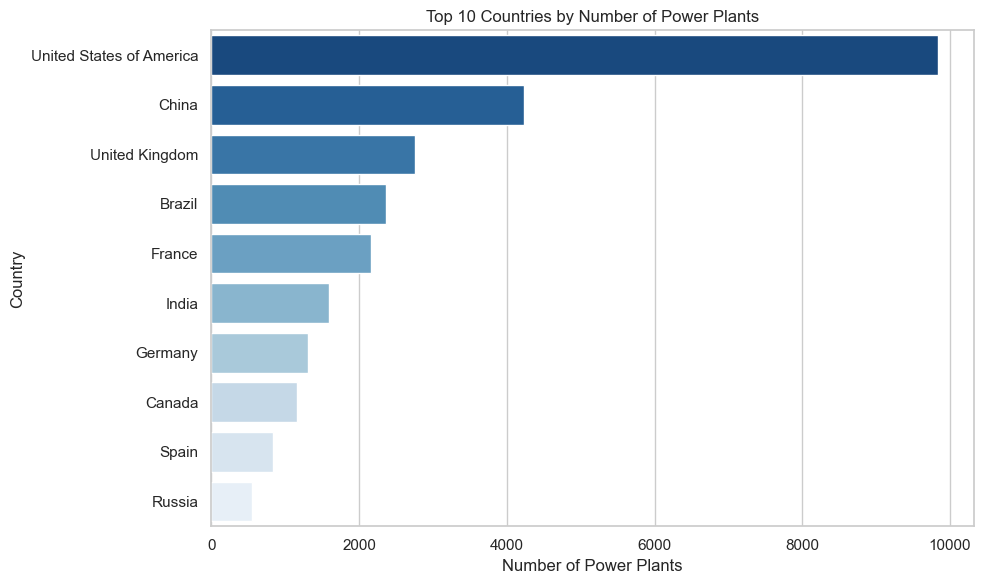

In [30]:
# Barplot: Top 10 countries by number of power plants (clean version)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,      # assign y to hue
    palette="Blues_r",
    dodge=False,                  # avoid grouped bars
    legend=False                  # don't show duplicate legend
)
plt.title("Top 10 Countries by Number of Power Plants")
plt.xlabel("Number of Power Plants")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

##### Distribution of power plants by primary fuel type

In [28]:
# Count of power plants per primary fuel type
plants_per_fuel = df_cleaned['primary_fuel'].value_counts().sort_values(ascending=False)

print("Power plants by fuel type:")
print(plants_per_fuel)

Power plants by fuel type:
primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: count, dtype: int64


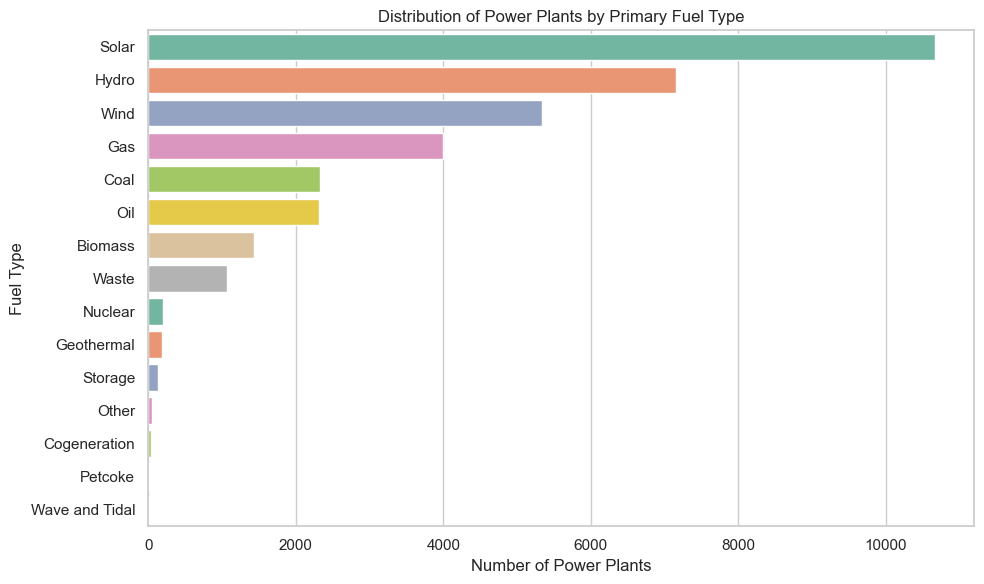

In [32]:
# Barplot: Distribution of power plants by fuel type (clean version)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=fuel_counts.values,
    y=fuel_counts.index,
    hue=fuel_counts.index,     # set hue to y variable
    palette="Set2",
    dodge=False,
    legend=False
)
plt.title("Distribution of Power Plants by Primary Fuel Type")
plt.xlabel("Number of Power Plants")
plt.ylabel("Fuel Type")
plt.tight_layout()
plt.show()

#### Step 1: Statistical Analysis

In [35]:
import numpy as np

# Filter out fuel types with no estimated generation data
fuel_groups = df_cleaned.groupby('primary_fuel')['estimated_generation_2017']

# Compute stats only for groups with valid data
fuel_output_stats = fuel_groups.agg([
    lambda x: np.mean(x.dropna()) if x.dropna().size > 0 else np.nan,
    lambda x: np.median(x.dropna()) if x.dropna().size > 0 else np.nan,
    lambda x: np.std(x.dropna()) if x.dropna().size > 0 else np.nan
])

fuel_output_stats.columns = ['mean_output', 'median_output', 'std_output']
fuel_output_stats = fuel_output_stats.dropna().sort_values(by='mean_output', ascending=False)

print(fuel_output_stats)

               mean_output  median_output   std_output
primary_fuel                                          
Nuclear       15038.405803      14219.260  9156.016993
Coal           4186.232424       2923.610  4674.775804
Gas            1525.692817        560.390  2458.707357
Hydro           494.891086         69.425  2165.953074
Other           393.510952        246.835   550.275466
Geothermal      380.352468        150.825   680.385066
Oil             221.302554          7.380   891.758080
Wind            128.972759         67.470   250.378785
Solar            32.590749         10.130    78.785232
Waste             7.674742          1.930    17.231957


##### Hypothesis Testing – Compare Mean Power Output Between Fuel Types

We performed a statistical analysis of the estimated power generation for 2017, grouped by fuel type, using NumPy to calculate the mean, median, and standard deviation. This allowed us to compare average output levels across different energy sources and detect variations in production performance.

##### Hypothesis Testing: Solar vs Coal (Example)

Objective: Test if the mean power output in 2017 differs significantly between Solar and Coal power plants. 

In [36]:
from scipy.stats import ttest_ind

# Extract values (excluding NaNs)
solar_output = df_cleaned[df_cleaned['primary_fuel'] == 'Solar']['estimated_generation_2017'].dropna()
coal_output = df_cleaned[df_cleaned['primary_fuel'] == 'Coal']['estimated_generation_2017'].dropna()

# Perform two-sample t-test
t_stat, p_value = ttest_ind(solar_output, coal_output, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -42.657
P-value: 0.0000


Since the p-value is much smaller than 0.05, we reject the null hypothesis.
This means there is a statistically significant difference in the mean power output between Solar and Coal power plants.

C:\Users\julia\AppData\Local\Temp\ipykernel_3216\2917386508.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


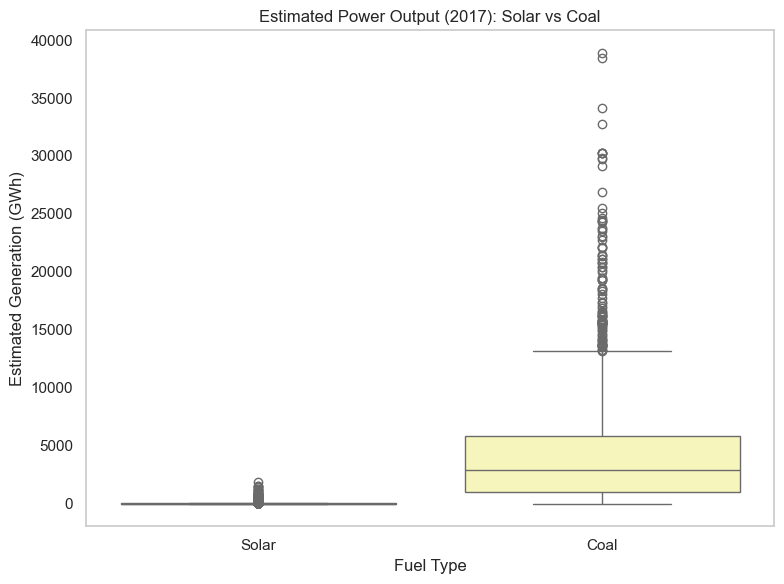

In [37]:
# Filter data for only Solar and Coal
df_subset = df_cleaned[df_cleaned['primary_fuel'].isin(['Solar', 'Coal'])]

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_subset,
    x='primary_fuel',
    y='estimated_generation_2017',
    palette='Set3'
)

plt.title('Estimated Power Output (2017): Solar vs Coal')
plt.xlabel('Fuel Type')
plt.ylabel('Estimated Generation (GWh)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

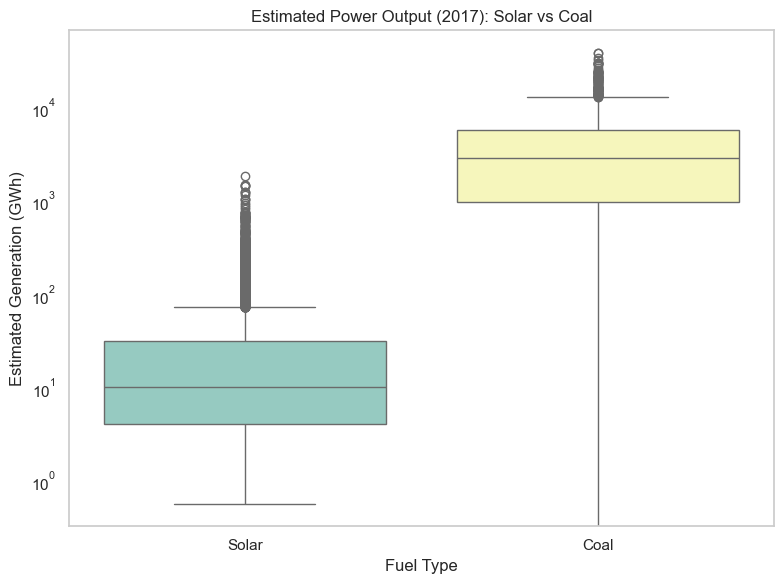

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_subset,
    x='primary_fuel',
    y='estimated_generation_2017',
    hue='primary_fuel',     # explicitly assign hue
    palette='Set3',
    dodge=False,
    legend=False
)
plt.yscale('log')
plt.title('Estimated Power Output (2017): Solar vs Coal')
plt.xlabel('Fuel Type')
plt.ylabel('Estimated Generation (GWh)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The boxplot compares the estimated power output in 2017 between Solar and Coal power plants.
Coal plants show a much higher median and wider spread, with many outliers above 10,000 GWh.
In contrast, Solar plants have a much lower median output, and most values remain below 100 GWh.
This visualization reinforces the statistical result that coal power plants produce significantly more electricity than solar ones on average.

#### Step 4: Time Series Analysis

In [42]:
df_time = df[['primary_fuel', 'capacity_mw', 'commissioning_year']].copy()
df_time = df_time[df_time['commissioning_year'].notna()]
df_time['commissioning_year'] = df_time['commissioning_year'].astype(int)

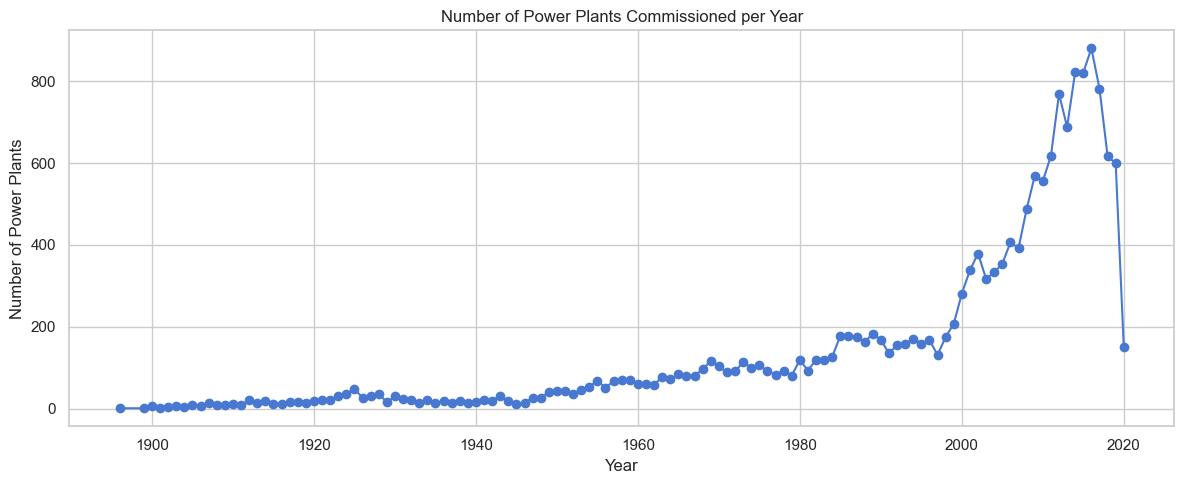

In [45]:
# Line plot: Number of power plants commissioned per year

# Count number of plants per year
yearly_counts = df_time['commissioning_year'].value_counts().sort_index()

# Plot the evolution over time
plt.figure(figsize=(12, 5))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title("Number of Power Plants Commissioned per Year")
plt.xlabel("Year")
plt.ylabel("Number of Power Plants")
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

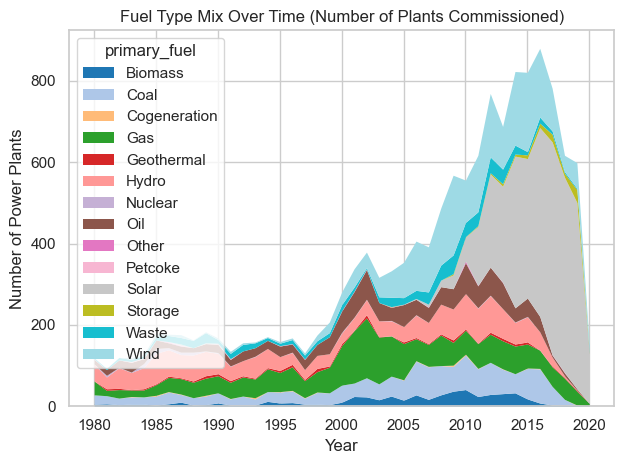

In [47]:
# Stacked Area Chart – Fuel Mix Over Time

# Group by year and fuel type, then count
fuel_mix = df_time.groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)

# Limit to relevant years (optionnel : ex. 1980+ pour lisibilité)
fuel_mix = fuel_mix[fuel_mix.index >= 1980]

# Plot the stacked area chart
plt.figure(figsize=(14, 8))
fuel_mix.plot.area(colormap='tab20', linewidth=0)
plt.title("Fuel Type Mix Over Time (Number of Plants Commissioned)")
plt.xlabel("Year")
plt.ylabel("Number of Power Plants")
plt.grid(True)
plt.tight_layout()
plt.show()


The stacked area chart shows how the mix of fuel types used in newly commissioned power plants has evolved since 1980.

We observe a clear shift:
- In the 2000s, fossil fuels (Coal, Gas, Oil) were dominant.
- From around 2010 onwards, Solar and Wind began to rise significantly.
- Around 2015–2018, Solar became the most frequently commissioned energy source, reflecting the global transition to renewables.

This transition highlights the increasing role of clean energy technologies in the global power landscape.

#### Step 5: Advanced Visualization

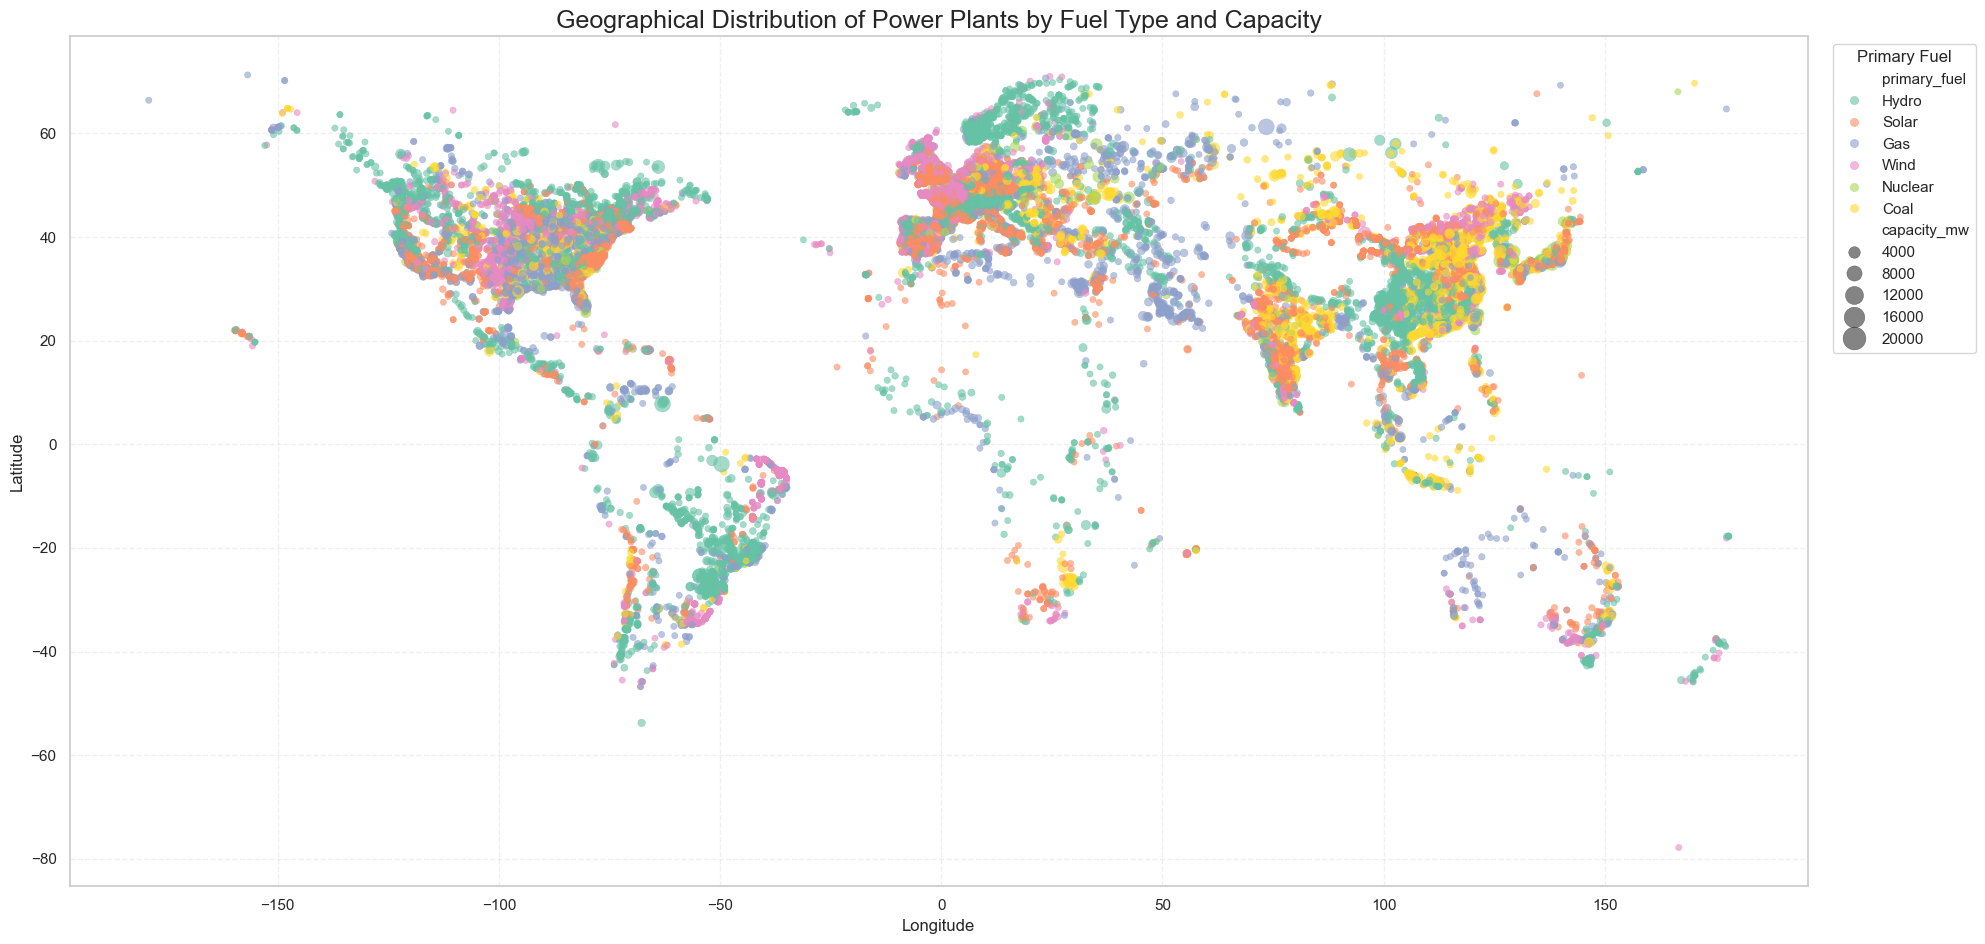

In [55]:
plt.figure(figsize=(20, 10))  # Larger size

sns.scatterplot(
    data=df_map,
    x='lon',
    y='lat',
    hue='primary_fuel',
    size='capacity_mw',
    sizes=(20, 300),  # Bigger point range
    alpha=0.6,
    palette='Set2',
    edgecolor=None,
    legend='brief'
)

plt.title("Geographical Distribution of Power Plants by Fuel Type and Capacity", fontsize=18)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Primary Fuel', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout(rect=[0, 0.02, 1, 0.98])  # Crop bottom space
plt.show()


This map shows the global distribution of power plants by primary fuel type, with point size proportional to their capacity.

- Renewable energies like Hydro, Solar, and Wind are spread across all continents, especially in the Americas, Europe, and Asia.
- Coal and Gas plants are concentrated in high-consumption countries such as the U.S., China, and India.
- Nuclear power plants are less common but typically have high capacity.

This visualization highlights both the diversity of energy sources and their geographical preferences.

#### Step 6: Matrix Operations in Real-World Context

In [58]:
# Matrix operations: Covariance and eigen decomposition of power plant attributes

# Sample: take only numerical features
features = df_cleaned[['capacity_mw', 'lat', 'lon']].dropna()

# Convert to NumPy matrix
X = features.to_numpy()

# Compute the covariance matrix
cov_matrix = np.cov(X.T)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [59]:
print("Covariance matrix:")
print(cov_matrix)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Covariance matrix:
[[ 2.39743483e+05 -1.46512725e+02  5.81707732e+03]
 [-1.46512725e+02  5.12506327e+02 -1.21328995e+02]
 [ 5.81707732e+03 -1.21328995e+02  6.14747738e+03]]

Eigenvalues:
[239888.34493566   6005.22827679    509.89320204]

Eigenvectors:
[[ 9.99690263e-01 -2.48871486e-02  9.13937503e-05]
 [-6.24482185e-04 -2.14133001e-02  9.99770514e-01]
 [ 2.48794803e-02  9.99460905e-01  2.14222092e-02]]


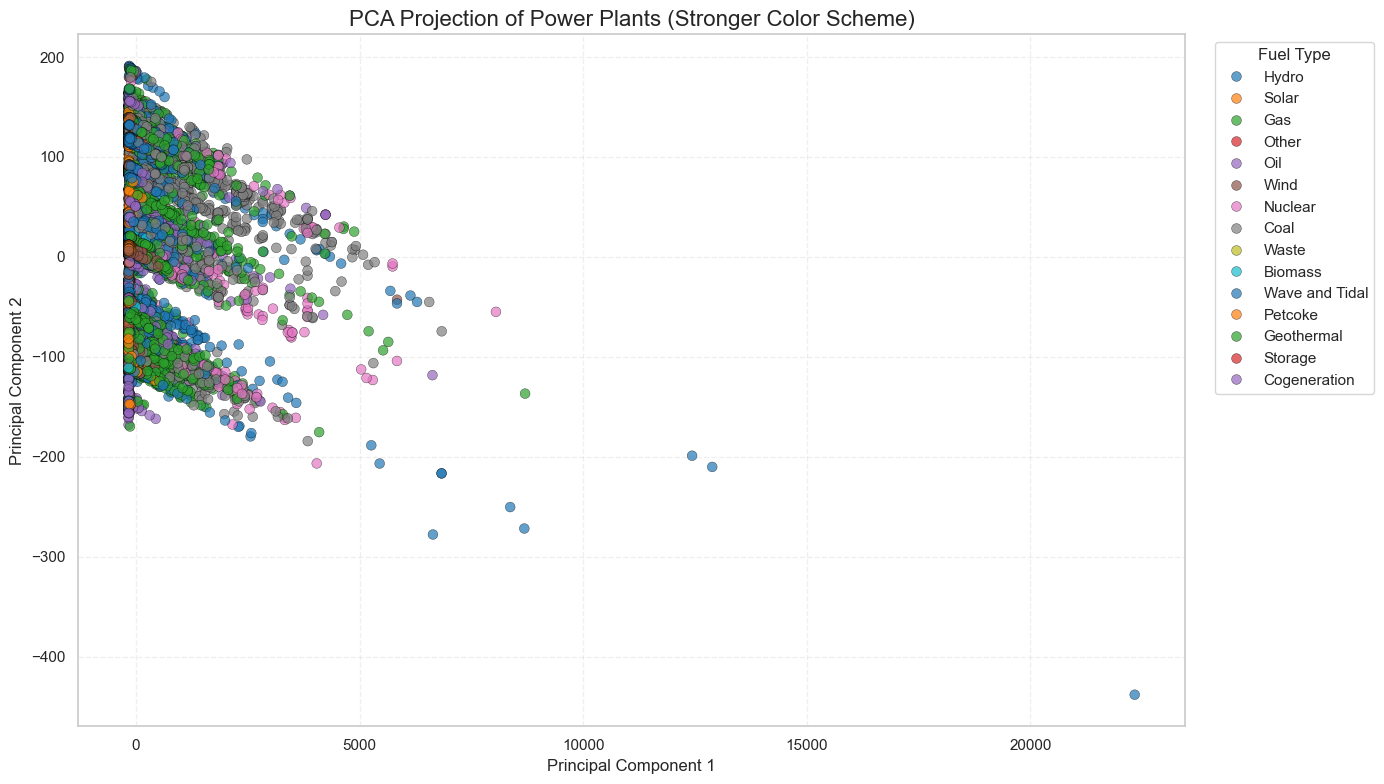

In [61]:
plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Fuel Type',
    palette='tab10',        # Couleurs plus contrastées
    alpha=0.7,
    s=50,
    edgecolor='black',      # Contour pour lisibilité
    linewidth=0.3
)

plt.title("PCA Projection of Power Plants (Stronger Color Scheme)", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title="Fuel Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In this analysis, we use the covariance matrix of three variables: installed capacity (MW), latitude, and longitude. This matrix reveals how these features vary and correlate with each other.

### Eigenvalues
The eigenvalues represent the amount of variance captured by each principal direction (component):
- The first eigenvalue (239,888) is much larger than the others, indicating that the first principal component captures most of the variance in the dataset.
- The second (6,005) and third (510) components capture much less information.

### Eigenvectors
Each eigenvector defines a direction in the original feature space:
- The first eigenvector points almost entirely in the direction of **installed capacity**, meaning capacity is the dominant feature driving variance.
- The second and third components capture more geographic variation (latitude and longitude).

This decomposition helps reduce the dimensionality of the dataset (via PCA), and is useful for clustering, visualization, and exploratory analysis. It shows that **power plant capacity is the main axis of differentiation**, while geographic coordinates offer secondary variation.

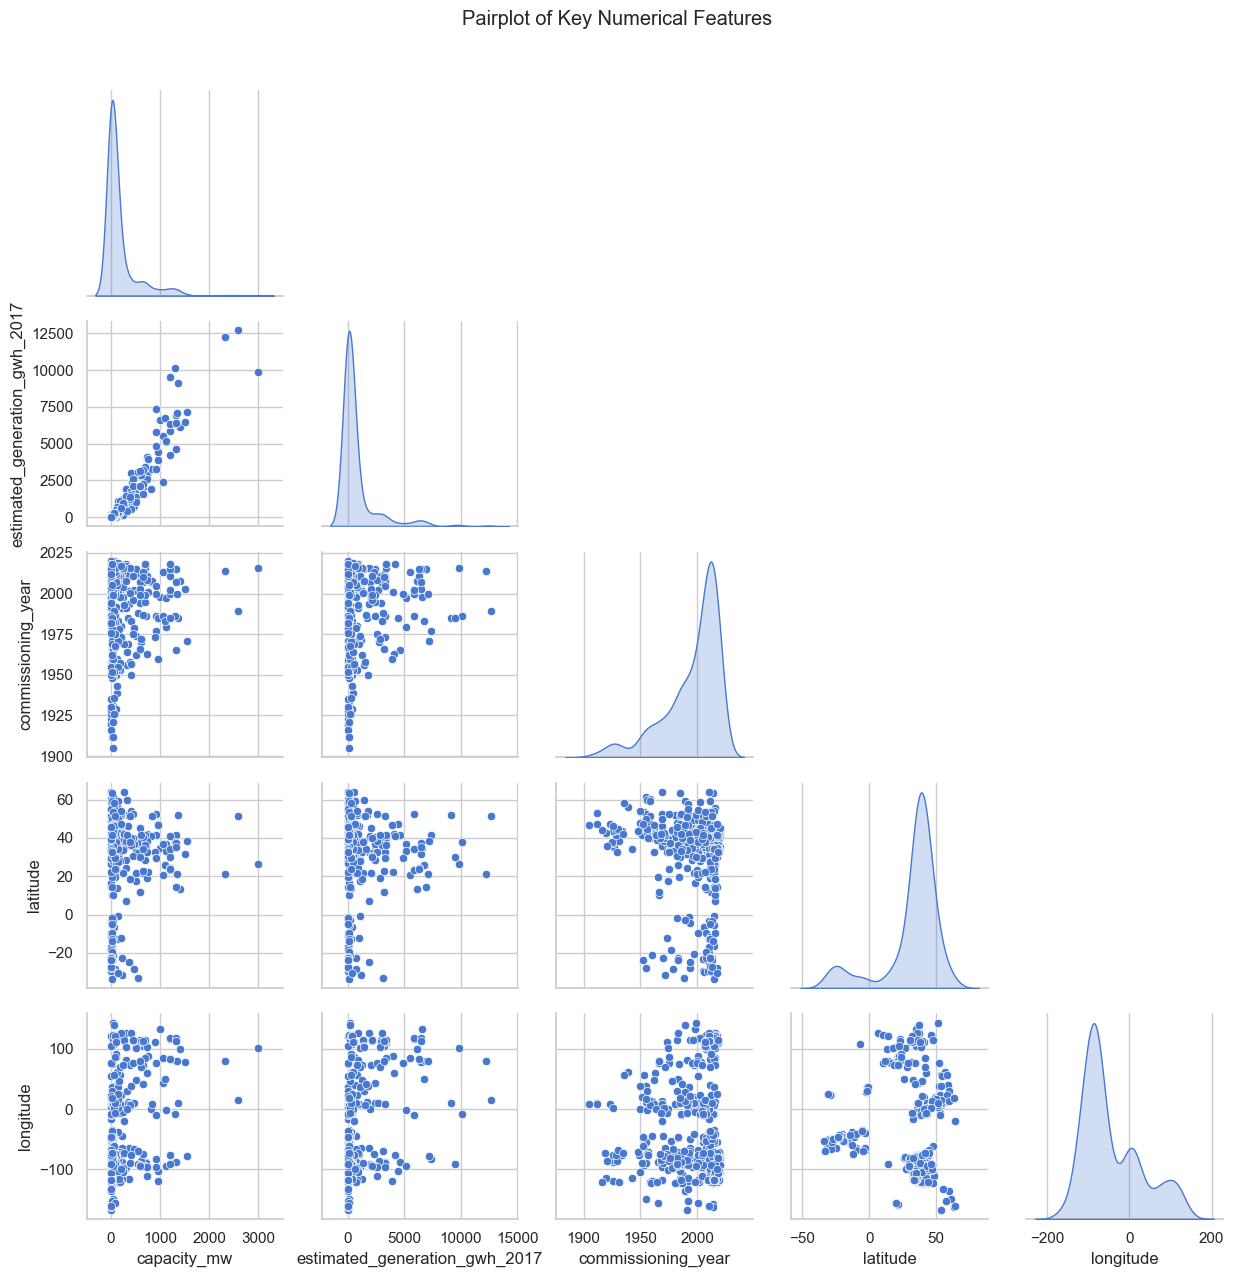

In [68]:
import seaborn as sns

# --- Subset réduit et propre ---
df_pair = df[columns_for_pca].dropna().sample(500, random_state=42)  # on échantillonne pour éviter surcharge

# --- Affichage pairplot ---
sns.pairplot(df_pair, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


This pairplot provides an overview of the relationships between numerical variables such as capacity (MW), estimated generation (GWh), commissioning year, and geographical coordinates (latitude and longitude).  
A strong positive correlation can be observed between capacity and estimated generation, as expected.  
Other relationships appear weak or unstructured, suggesting additional factors influence location and commissioning year.

#### Step 7: Integrating NumPy with Pandas and Matplotlib

##### Complex filtering with NumPy in Pandas

In [69]:
import numpy as np

# Convert DataFrame columns to NumPy arrays
capacity_array = df['capacity_mw'].values
fuel_array = df['primary_fuel'].values
year_array = df['commissioning_year'].values

# Filter: solar plants commissioned after 2010 and capacity > 100 MW
mask = (fuel_array == 'Solar') & (year_array > 2010) & (capacity_array > 100)
solar_modern_large = df[mask]

print(f"Number of modern large solar plants: {len(solar_modern_large)}")


Number of modern large solar plants: 78


##### Create advanced plots using NumPy arrays

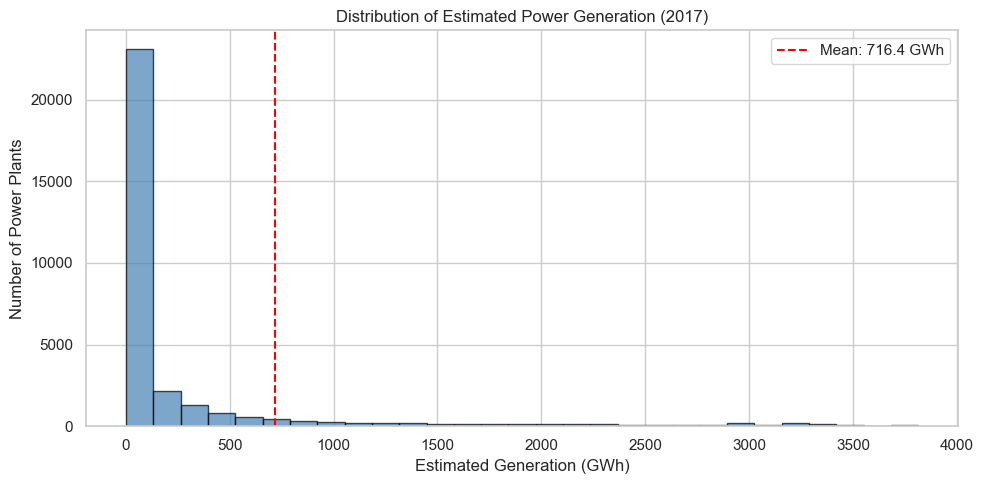

In [70]:
import matplotlib.pyplot as plt

# Example: histogram with custom NumPy bins
generation = df['estimated_generation_gwh_2017'].dropna().values
bins = np.linspace(0, np.percentile(generation, 95), 30)

plt.figure(figsize=(10, 5))
plt.hist(generation, bins=bins, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(generation), color='red', linestyle='--', label=f"Mean: {np.mean(generation):.1f} GWh")
plt.title("Distribution of Estimated Power Generation (2017)")
plt.xlabel("Estimated Generation (GWh)")
plt.ylabel("Number of Power Plants")
plt.legend()
plt.tight_layout()
plt.show()


Final Summary: NumPy, Pandas & Matplotlib Integration
This project demonstrates how NumPy, Pandas, and Matplotlib can be integrated to analyze and visualize the Global Power Plant dataset effectively.

Key Contributions:
Data cleaning & preprocessing with Pandas and NumPy (handling missing values, renaming, conversions)

Exploratory analysis to understand the distribution of power plants by fuel type, country, and capacity

Statistical analysis including group-wise aggregations, hypothesis testing, and visual comparison

Time series insights based on commissioning years and trends in fuel type usage

Advanced visualization such as geographic plots and heatmaps to highlight key patterns

Matrix analysis with NumPy: covariance matrix, eigen decomposition, PCA, and pairplot interpretations

Combined logic using NumPy for filtering and custom plotting